<a href="https://colab.research.google.com/github/Lahasyakr/cs666student/blob/main/CS666_Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

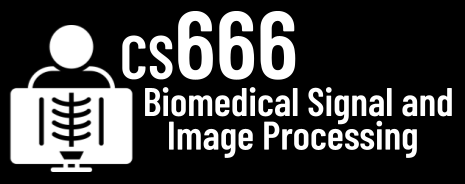
# Assignment 7

In [ ]:
# NAME:Lahasya Kakkdde Rajanna

In [ ]:
# In this assignment, we will explore the Imaging Data Commons,
# a data repository from the National Cancer Institute.

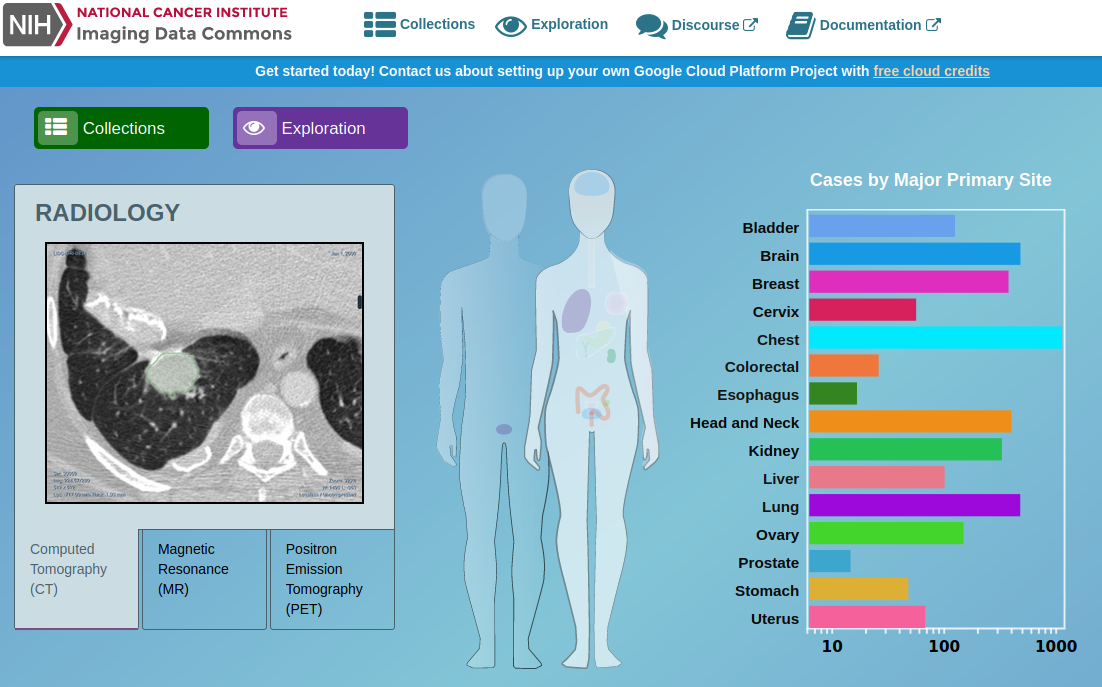

**Task 1**: Browse the IDC datasets and find a combined CT or MRI with PET! [10 Points]

In [ ]:
#
# Visit https://portal.imaging.datacommons.cancer.gov/ and find a dataset
# that includes structural imaging such as CT or MRI combined with a PET scan.
#
# You can start by selecting the type of a cancer case such as Bladder, Brain etc.
# Hint: Head and Neck include many PET scans.
#

In [ ]:
# TODO: Open the integrated OHIF viewer to view the data.
#
# 1) Select a collection, then a case, then a study in the IDC interface.
# 2) To open the OHIF viewer, click on the view icon.
#

In [ ]:
#
# TODO:https://viewer.imaging.datacommons.cancer.gov/viewer/1.3.6.1.4.1.14519.5.2.1.8162.7003.140890365612664665927036639152
#

In [ ]:
# 3) Paste a screenshot of the viewer after the data was loaded below.

TODO: Add screenshot of the viewer.
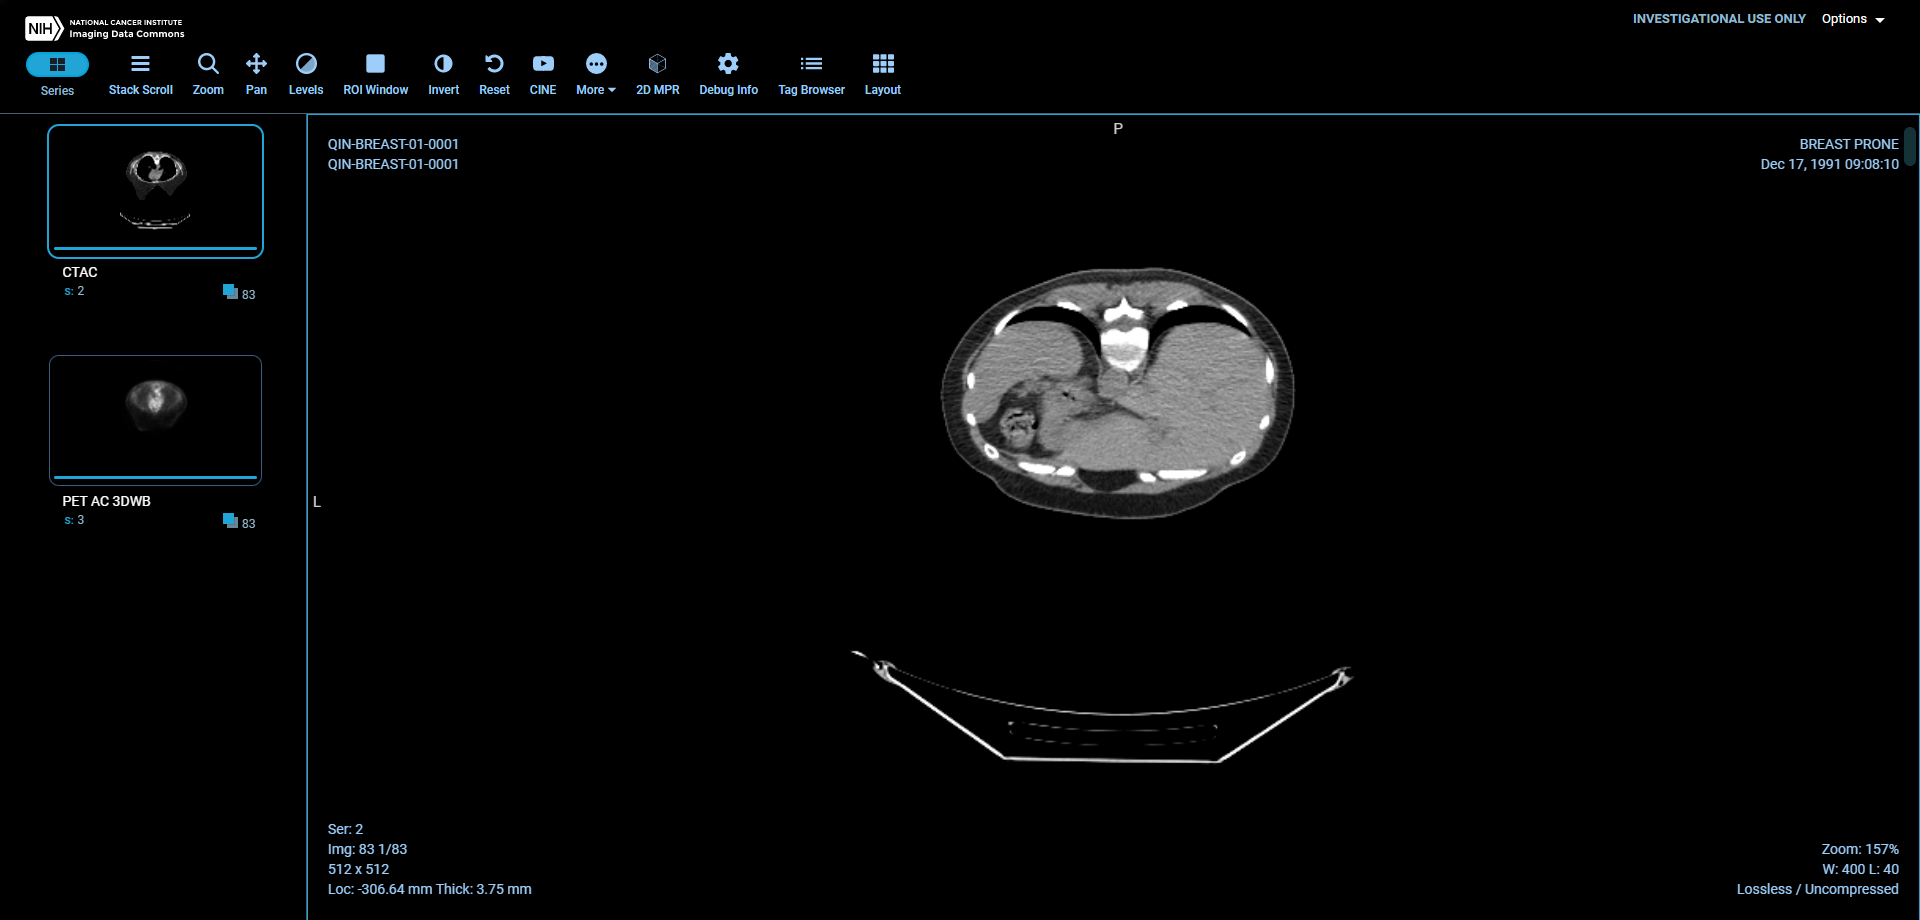

**Task 2**: Visualize structural and PET side-by-side! [20 Points]

In [ ]:
# In the OHIF viewer, please change the layout to show the structural image
# next to the PET scan.
#
# TODO: Use the LAYOUT functionality in the toolbar to switch to a 2-column layout.

In [ ]:
# TODO: Find the cancerous lesion.
#
# 1) Navigate through the PET image to find the cancerous lesion.

In [ ]:
# TODO: Sync the structural scan (CT or MR) to the PET scan with the lesion.
#
# Hint: The "Loc" label in the bottom left of both scans should roughly match.
# Hint 2: The Levels tool allows Window/Level adjustment to increase contrast.
#

In [ ]:
# TODO: Paste a screenshot showing the 2-column layout below.

TODO: Add your screenshot showing the cancerous lesion and structural scan side-by-side.

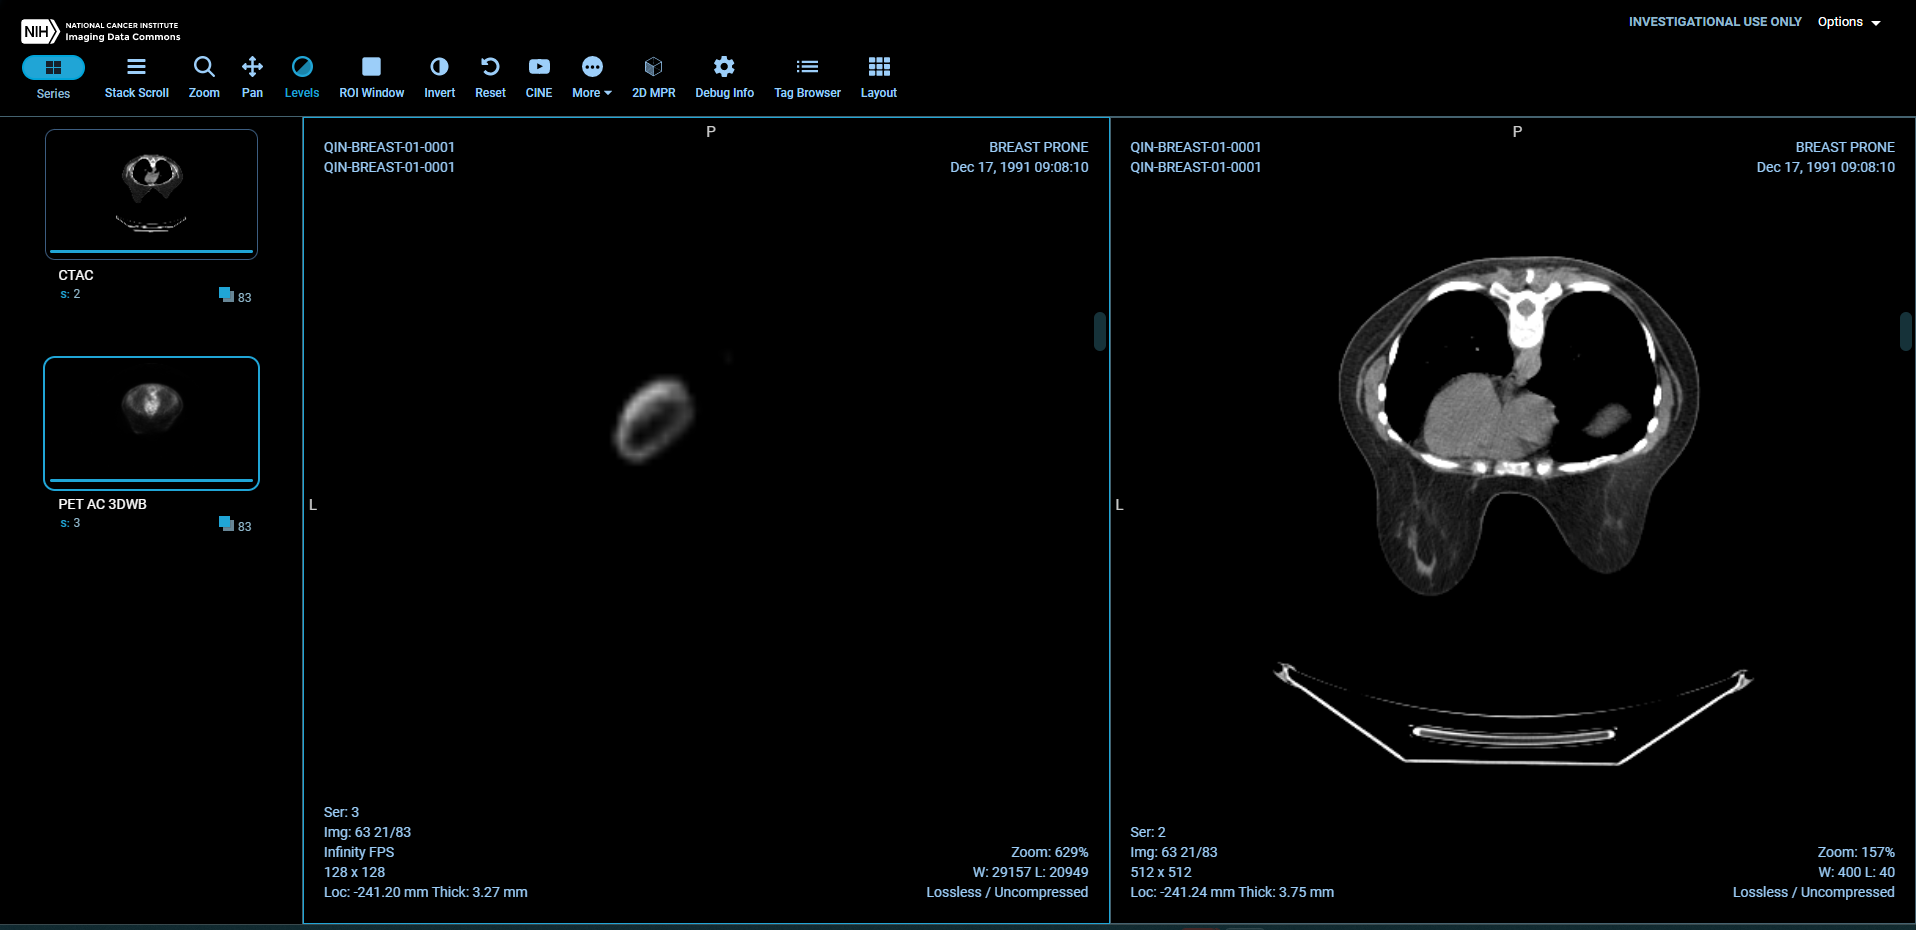

**Task 3**: Let's access the pixel data! [20 Points]

In [ ]:
#
# IMPORTANT: SWITCH BACK TO THE STANDARD LAYOUT (1-column) or RELOAD THE PAGE.
#
# AND: Visualize the CT/MRI scan rather than the PET scan for this task.
#
# We will now grab the pixel data of the currently displayed slice
# using the Javascript console.
#

In [ ]:
# 1) Open the Developer Tools of your browser and access the JS console.

In [ ]:
# 2) The following code allows to access the pixel data of the slice that
# is currently displayed.
#
#   element = cornerstone.getEnabledElements()[0];
#   pixels = element.image.getPixelData();
#

In [ ]:
# 3): What is the minimum pixel value of the current slice?
#
# Hint: There are multiple ways of doing this according to
# https://medium.com/coding-at-dawn/the-fastest-way-to-find-minimum-and-maximum-values-in-an-array-in-javascript-2511115f8621
#

In [ ]:
#
#
# TODO: YOUR CODE GOES HERE
element = cornerstone.getEnabledElements()[0];
pixels = element.image.getPixelData();

var minpixel = pixels[0];
for (var i = 1; i < pixels.length; i++) {
  if (pixels[i] < minpixel) {
    minpixel = pixels[i];
  }
}

In [ ]:
# TODO: MINIMUM VALUE OF THE SLICE
-2000

-2000 is the minimum value of the slice

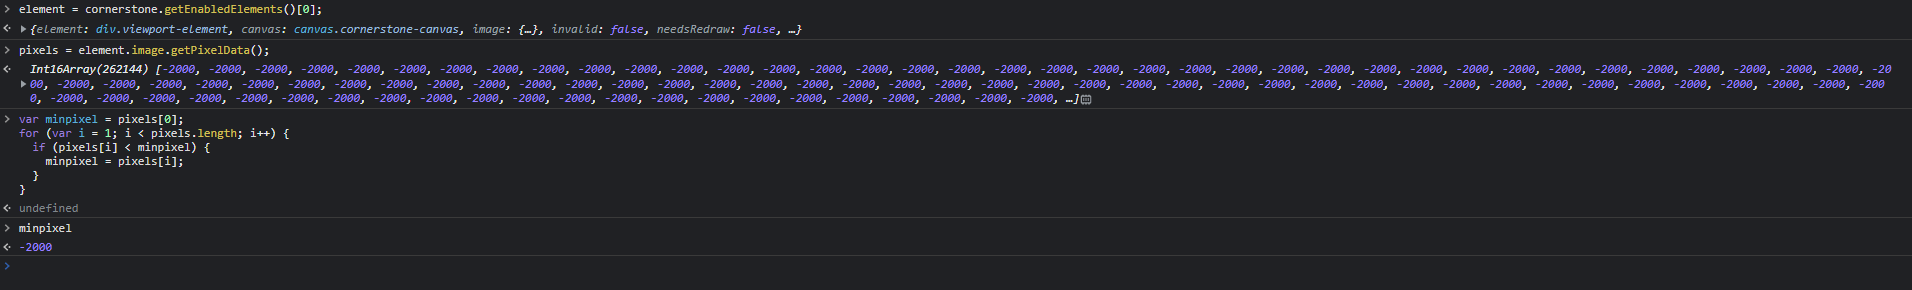

**Task 4**: Let's apply a 3x3 filter mask! [30 Points]

In [ ]:
# Here we will modify the pixel data!
#
# The following code allows you to set the pixels of the current slice.
#
#   pixels.set(new_pixels);
#
# Write code to APPLY A FILTER MASK to the pixels.
#
# Hint: You can use the following code to get the dimensions of the current slice.
#   w = element.image.width;
#   h = element.image.height;
#
# You can decide which filter mask to apply (e.g., Sobel, Gaussian blur, edge detection..).
#
# After setting new pixel values, you can re-draw/re-render the current slice with this command:
#
#   cornerstone.renderGrayscaleImage(element, true);
#

In [ ]:
#
#
# TODO: YOUR CODE GOES HERE
# sobel edge detection
#

element = cornerstone.getEnabledElements()[0];
pixels = element.image.getPixelData();

const sobel_v =
[
  -1.0, 0.0, +1.0,
  -2.0, 0.0, +2.0,
  -1.0, 0.0, +1.0
];

const sobel_h =
[
  -1.0, -2.0, -1.0,
   0.0,  0.0,  0.0,
  +1.0, +2.0, +1.0
];



var filteredPixels = new Int16Array(pixels.length);

let width =element.image.width;


  // now edge detect
  for (let i = 0; i < pixels.length; i++) {
    // loop our 3x3 kernels, build our kernel values
    let hSum = 0;
    let vSum = 0;
    for (let y = 0; y < 3; y++)
      for (let x = 0; x < 3; x++) {
        let pixel = pixels[i + (width * y) + x];
        let kernelAccessor = (x) * 3 + (y);
        hSum += pixel * sobel_h[kernelAccessor];
        vSum += pixel * sobel_v[kernelAccessor];
      }
    // apply kernel evaluation to current pixel
    filteredPixels[i] = Math.sqrt(hSum * hSum + vSum * vSum);
    // pixels[i] = Math.abs((hSum + vSum) * 0.5);
  };

pixels.set(filteredPixels);

cornerstone.renderGrayscaleImage(element, true);

#reference - https://gist.github.com/arifd/9ef3d02b43e858170f52553319c05952

TODO: Add Screenshot of the filtered slice.
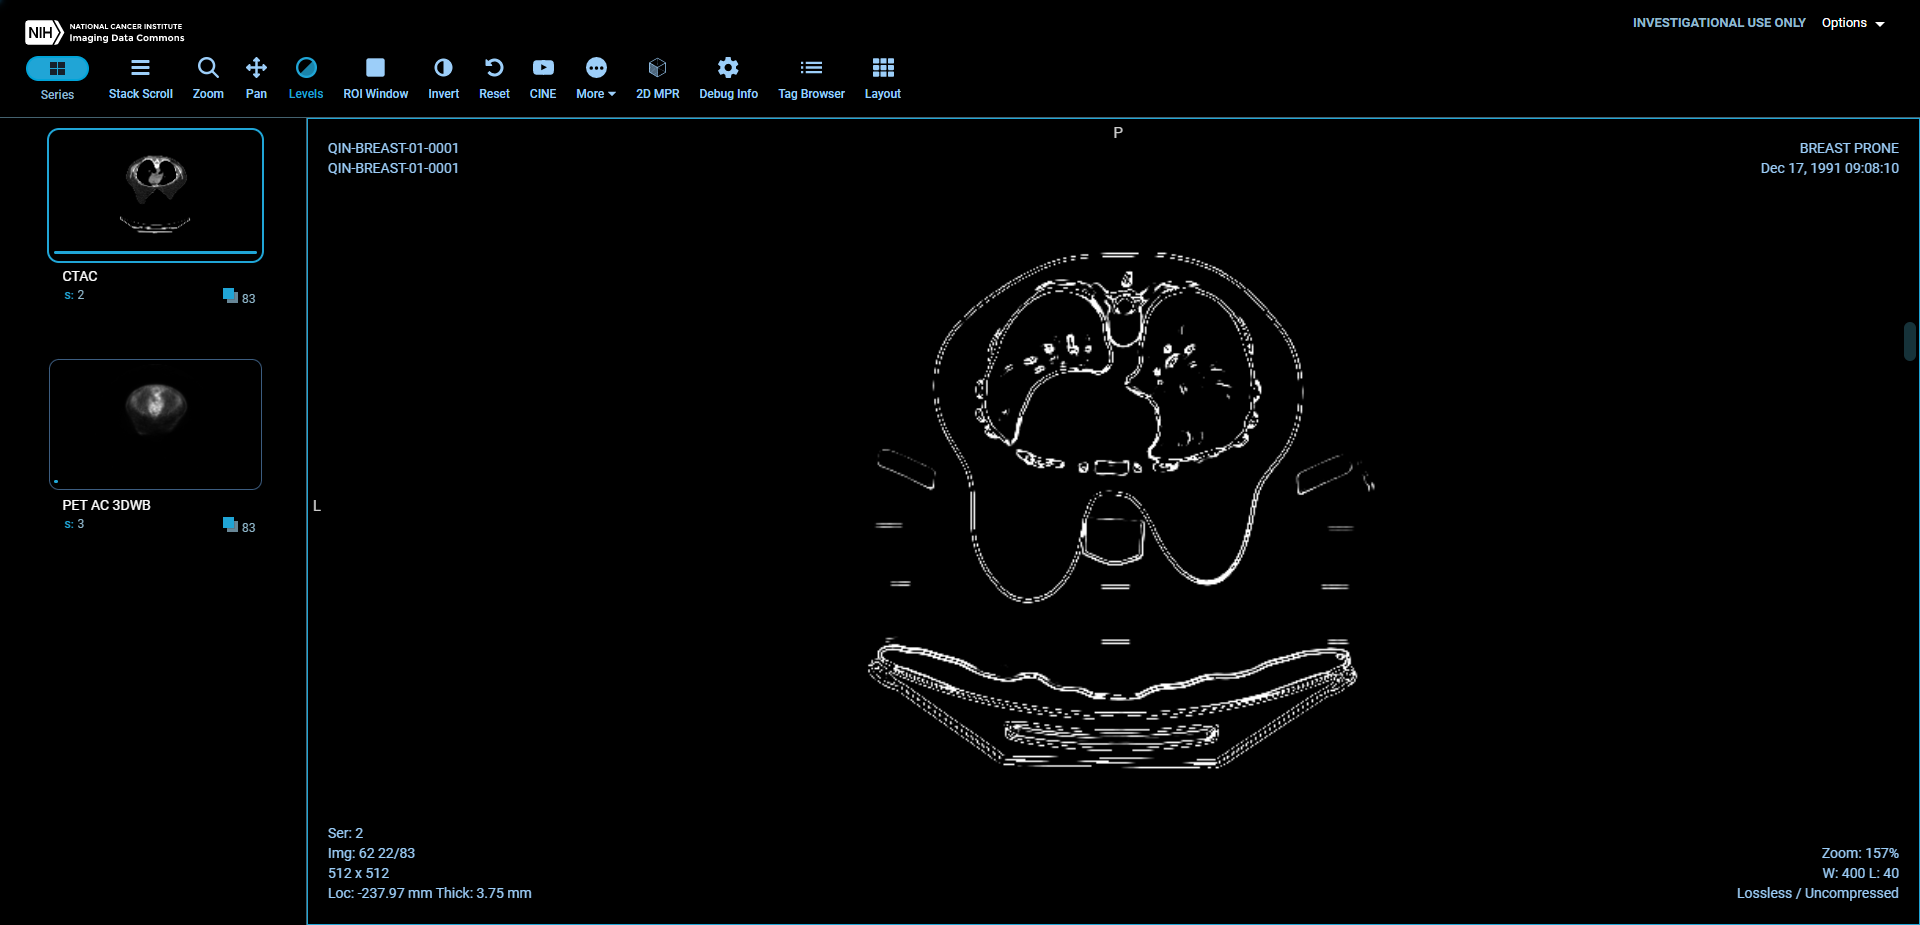

**Task 5**: Use the Segment Anything model to annotate the scan. [20 Points]

In [ ]:
#
# Now we will use the bookmarklet to run Meta's Segment Anything model on the data.
#
# 1) Visit https://cs666.org/sam/ and install the bookmarklet.
#
# 2) Run the model on a structure of your choice.
#    HINT: The video shows how to do it https://www.youtube.com/watch?v=2kxrqQfjsQw
#
# 3) Take a screenshot of the result.
#

TODO: Add Screenshot of the segmented slice.
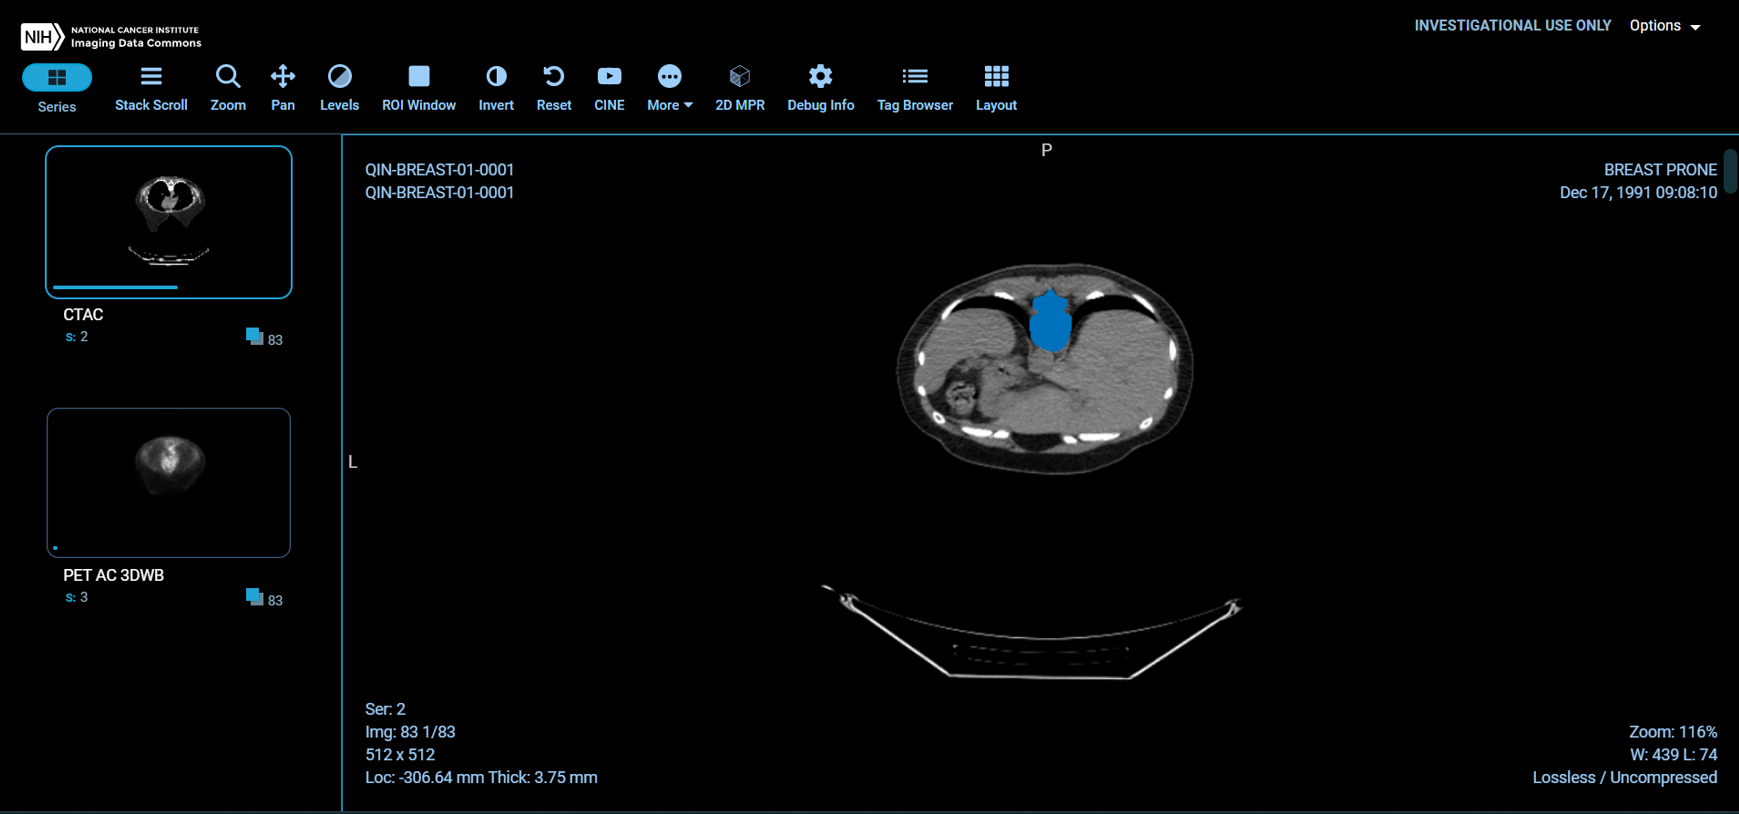


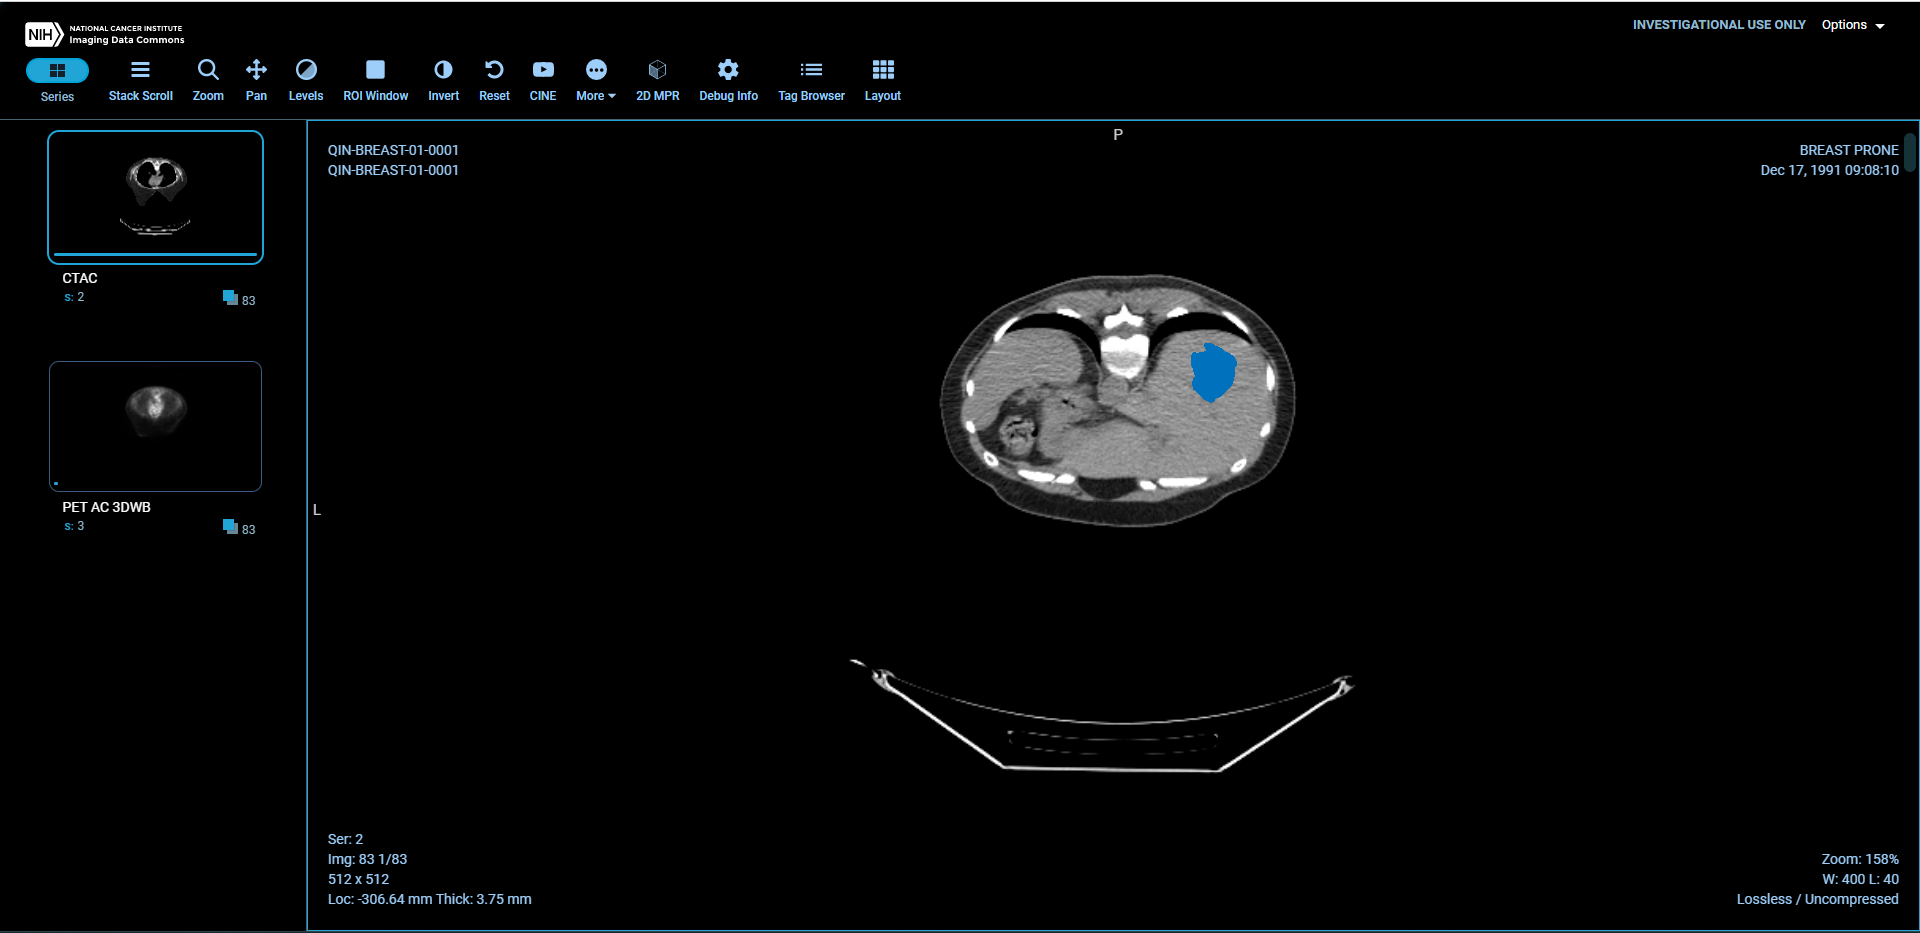

In [ ]:
#
# 4) Now, please study the code of the bookmarklet.
#    See https://gist.github.com/haehn/bbec8cf8442adea5bb10c08d9c3cc13f
#
#    TODO: What is the main difference between processing with the bookmarklet
#          versus the kernel mask filtering from above in terms of accessing
#          the pixels?
#

#
The main difference between processing with the code of  bookmarklet and the above kernel mask filtering code is how they access and manipulate pixels.

In the  kernel mask filtering code:
  The cornerstone library is used to access an image element and retrieve its pixel data.
  The pixel data is stored in the pixels array.
  The code loops through each pixel and applies a 3x3 kernel to calculate the edge detection values.
  The resulting filtered pixel values are stored in the filteredPixels array.
  Finally, the filtered pixel values are set back to the original pixels array, and the grayscale image is rendered using cornerstone.renderGrayscaleImage().

On the other hand, the bookmarklet code snippet:
  Utilizes the canvas element directly to access the image data.
  It converts the image data to a base64 string and sends it to an endpoint using XMLHttpRequest.
  The returned embedding is used in the segment function to perform segmentation.
  The segment function uses the canvas context to retrieve the image data again.
  The arrayToImageData function converts the segmentation mask to ImageData object and applies the mask to the original image.
  The resulting masked image is rendered on the canvas.


In summary, the kernel mask filtering code operates on the pixel data retrieved from the cornerstone library, whereas the bookmarklet code snippet works with the image data obtained from the canvas element directly.





The main difference between processing with the code of  bookmarklet and the above kernel mask filtering code is how they access and manipulate pixels.

- In the  kernel mask filtering code:
   1. The cornerstone library is used to access an image element and retrieve its pixel data.
   2. The pixel data is stored in the pixels array.
   3.The code loops through each pixel and applies a 3x3 kernel to calculate the edge detection values.
   4. The resulting filtered pixel values are stored in the filteredPixels array.
   5. filtered pixel values are set back to the original pixels array, and the grayscale image is rendered using cornerstone.renderGrayscaleImage().

- On the other hand, the bookmarklet code snippet:
   1. Utilizes the canvas element directly to access the image data.
   2. It converts the image data to a base64 string and sends it to an endpoint using XMLHttpRequest.
   3. The returned embedding is used in the segment function to perform segmentation.
   4. The segment function uses the canvas context to retrieve the image data again.
   5. The arrayToImageData function converts the segmentation mask to ImageData object and applies the mask to the original image.
  The resulting masked image is rendered on the canvas.


In summary, the kernel mask filtering code operates on the pixel data retrieved from the cornerstone library, whereas the bookmarklet code snippet works with the image data obtained from the canvas element directly.

**Bonus 1**: Create a Segment Anything bookmarklet for NiiVue.js-based installations. [33 Points]

In [ ]:
#
# Similar to the code from Task 5, please create a bookmarklet (JS injection) 
# for a NiiVue.js-based visualization such as: https://mpsych.github.io/CACTAS/
#
# HINT: nv.drawSelectionBox([x,y,w,h]) draws a selection box and here is a related
#       github issue: https://github.com/niivue/niivue/issues/596
#
# HINT2: You will want to hide the blue orientation lines before grabbing the
#        canvas pixels.
#          nv.setCrosshairColor([0, 0, 0, 0]);
#          nv.opts.crosshairWidth = 0.;
#          nv.updateGLVolume();
#
# HINT3: The CACTAS repo has a lot of useful NiiVue.js code snippets
#        https://github.com/mpsych/cactas
#



javascript: (function () {
    var nv = window.nv;
    nv.setCrosshairColor([0, 0, 0, 0]);
    nv.opts.crosshairWidth = 0;
    nv.setSelectionBoxColor([0, 1, 0, 0.5]);
    nv.updateGLVolume();
    var canvas = nv.canvas;
    var width = canvas.width;
    var height = canvas.height;
    var context = canvas.getContext('2d');
    function drawSelectionBox(x, y, w, h) {
      nv.drawSelectionBox([x ,y,w,h],'red');
    }
    canvas.addEventListener('mouseup', function(event) {
      var rect = canvas.getBoundingClientRect();
      var x = event.clientX - rect.left;
      var y = event.clientY - rect.top;
      var boxWidth = 100;
      var boxHeight = 100;
      var boxX = x - boxWidth / 2;
      var boxY = y - boxHeight / 2;
      drawSelectionBox(boxX, boxY, boxWidth, boxHeight);
      var imageData = context.getImageData(0, 0, width, height);
      var pixels = new Uint8Array(imageData.data.buffer);
      segment(pixels, width, height, boxX, boxY, boxWidth, boxHeight);
    });

    function segment(pixels, width, height, x, y, w, h) {
      console.log('Segmenting region:', x, y, w, h);
      var segmentedPixels = new Uint8Array(pixels.length);
      for (var i = 0; i < segmentedPixels.length; i++) {
        if (pixels[i] > 0) {
          segmentedPixels[i] = 255;
        }
      }
      var segmentedImageData = new ImageData(segmentedPixels, width, height);
      context.putImageData(segmentedImageData, 0, 0);
    }
  })();
  

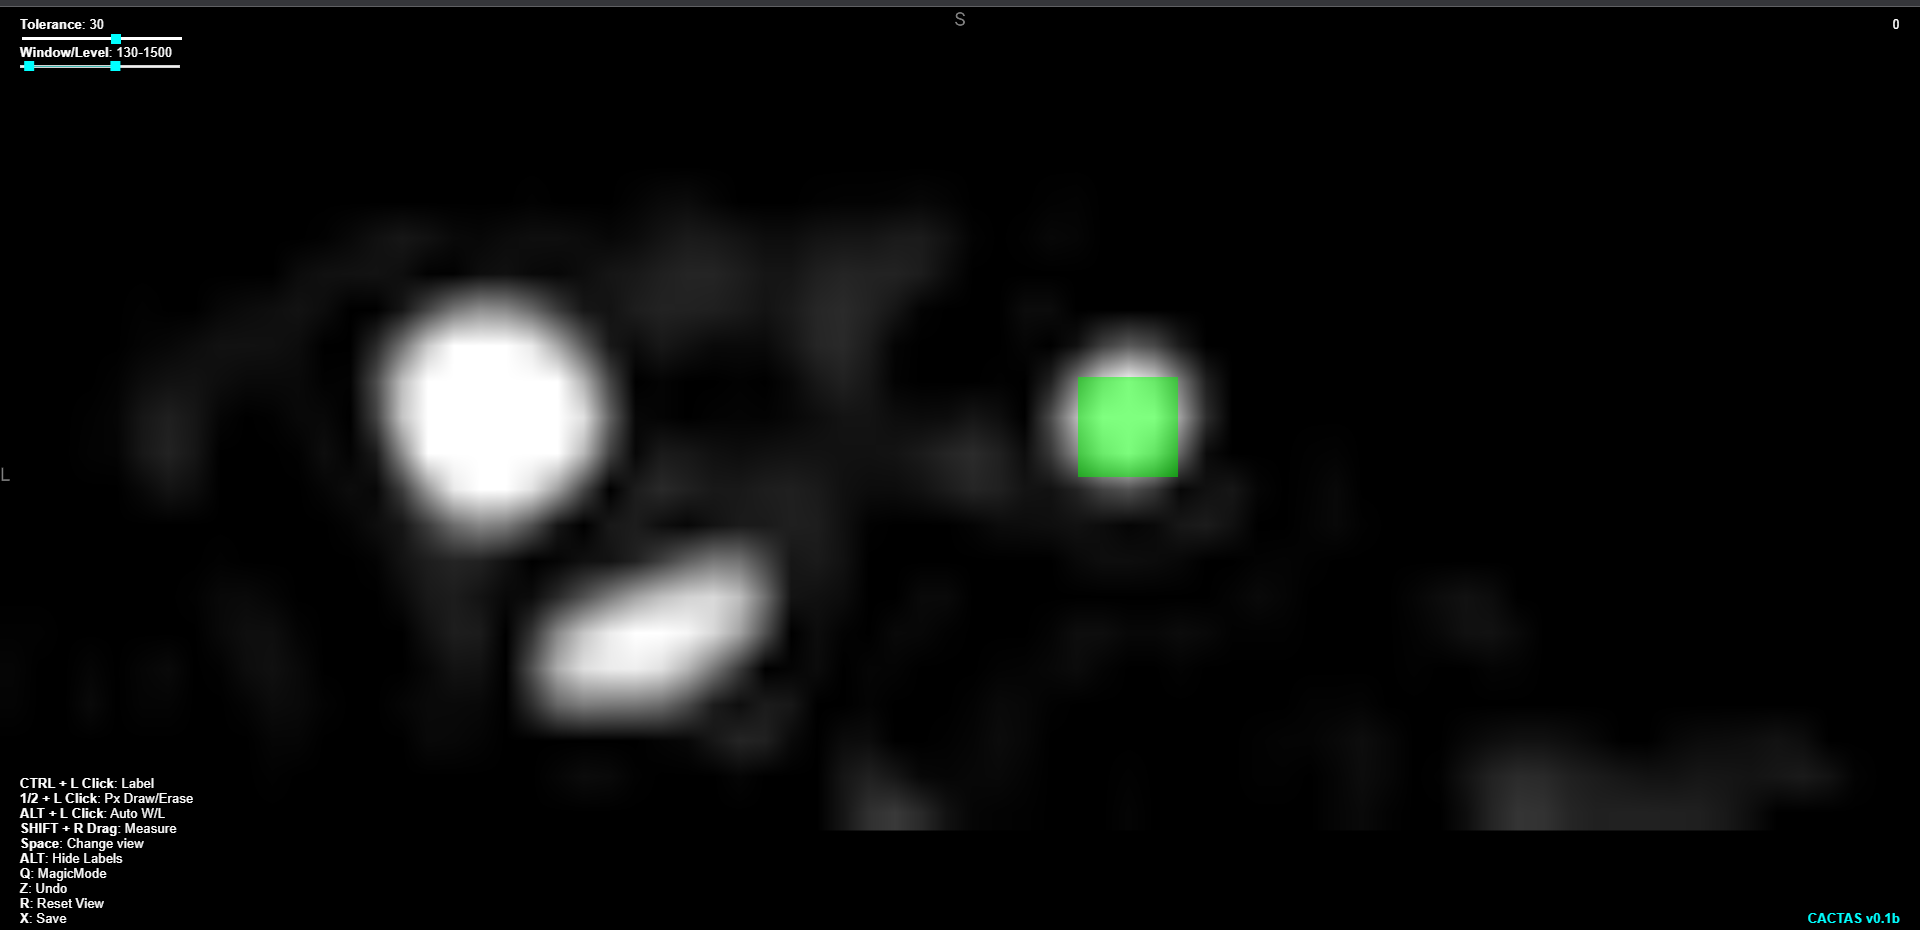

**Bonus 2**: Plugin your NiiVue.js bookmarklet on OpenNeuro.org. [Summer Job]

In [ ]:
#
# Integrate the Segment Anything bookmarklet with OpenNeuro.org, for example here:
# https://openneuro.org/datasets/ds004513/versions/1.0.2/file-display/sub-s033:ses-open:anat:sub-s033_ses-open_T1w.nii.gz
#
# And here is a related Github issue: https://github.com/OpenNeuroOrg/openneuro/issues/2815
#
# STRETCH GOALS TO STRENGTHEN YOUR APPLICATION:
#  1. Run on pixel data rather than canvas imagedata.
#  2. Run in 3D!
#

In [ ]:
#
# THANK YOU!!!
#
#       .--..--..--..--..--..--.
#     .' \  (`._   (_)     _   \
#   .'    |  '._)         (_)  |
#   \ _.')\      .----..---.   /
#   |(_.'  |    /    .-\-.  \  |
#   \     0|    |   ( O| O) | o|
#    |  _  |  .--.____.'._.-.  |
#    \ (_) | o         -` .-`  |
#     |    \   |`-._ _ _ _ _\ /
#     \    |   |  `. |_||_|   |
#     | o  |    \_      \     |     -.   .-.
#     |.-.  \     `--..-'   O |     `.`-' .'
#   _.'  .' |     `-.-'      /-.__   ' .-'
# .' `-.` '.|='=.='=.='=.='=|._/_ `-'.'
# `-._  `.  |________/\_____|    `-.'
#    .'   ).| '=' '='\/ '=' |
#    `._.`  '---------------'
#            //___\   //___\
#              ||       ||
#     LGB      ||_.-.   ||_.-.
#             (_.--__) (_.--__)
#
#